## Step 1: Reading and Understanding the Data

In [218]:
import warnings
warnings.filterwarnings('ignore')

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from pandas.plotting import lag_plot

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [220]:
bikeshare_df = pd.read_csv('day.csv')

In [221]:
 bikeshare_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [222]:
bikeshare_df.shape

(730, 16)

In [223]:
bikeshare_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [224]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


checking for the null values in column data

In [225]:
bikeshare_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Renaming the columns for readibility

In [226]:
bikeshare_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [227]:
bikeshare_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [228]:
bikeshare_df.drop_duplicates(inplace=True)

dropping the unwanted columns
"instant" has only seq order of numbers.
"dteday" has date which can be used by year and month.
"casual" and "registered" seems to be the breakup by category for cnt column.

In [229]:
bikeshare_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

visualizations for Continuous variables

<Figure size 2400x1600 with 0 Axes>

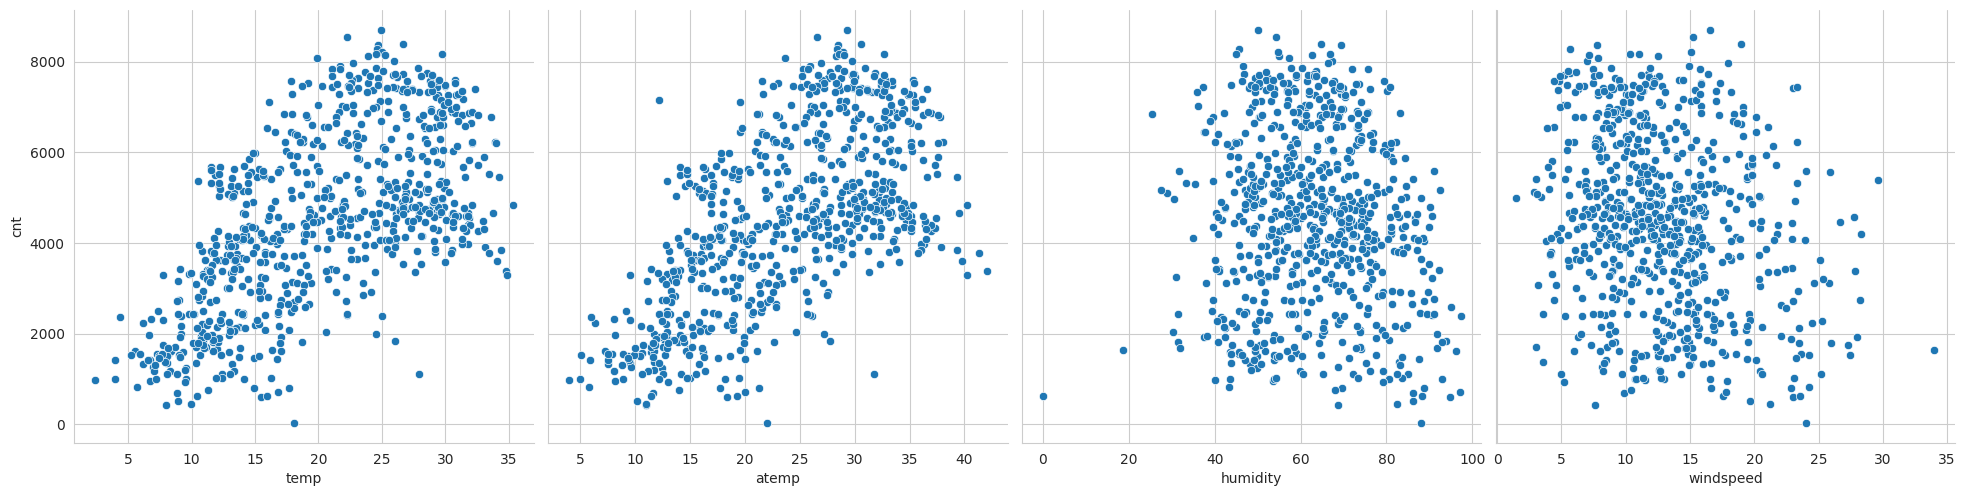

In [230]:
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")
sns.pairplot(data=bikeshare_df,x_vars=['temp','atemp','humidity','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);
plt.show()

Removing Outliers from Continuous Variables

"temp":

from the analysis we can see that there are couple fo outliners on temp between 15-20 < 100 & 25-30 < 2000

"atemp"

from the analyis the outliers are in range 20-25 < 100 & 30-35 < 2000

"humidity":

from the analyis outliers are in range < 20

"windspeed"

from the analysis outliers are > 30

In [231]:

#temp
bikeshare_df = bikeshare_df.drop(index = bikeshare_df[(bikeshare_df['temp'] > 15) & (bikeshare_df['temp'] < 20) & (bikeshare_df['cnt'] < 100)].index)
bikeshare_df = bikeshare_df.drop(index = bikeshare_df[(bikeshare_df['temp'] > 25) & (bikeshare_df['temp'] < 30) & (bikeshare_df['cnt'] < 2000)].index)

#atemp
bikeshare_df = bikeshare_df.drop(index = bikeshare_df[(bikeshare_df['atemp'] > 20) & (bikeshare_df['atemp'] < 25) & (bikeshare_df['cnt'] < 100)].index)
bikeshare_df = bikeshare_df.drop(index = bikeshare_df[(bikeshare_df['atemp'] > 30) & (bikeshare_df['atemp'] < 35) & (bikeshare_df['cnt'] < 2000)].index)


#humidity
bikeshare_df = bikeshare_df.drop(index = bikeshare_df[(bikeshare_df['humidity'] < 20)].index)

#windspeed
bikeshare_df = bikeshare_df.drop(index = bikeshare_df[(bikeshare_df['windspeed'] > 30)].index)
bikeshare_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


correlation analysis for continueous variables

In [232]:
bikeshare_df[['temp','atemp','humidity','windspeed','cnt']].corr()

,temp,atemp,humidity,windspeed,cnt
temp,1.000000,0.991726,0.122673,-0.160295,0.635560
atemp,0.991726,1.000000,0.136886,-0.186807,0.638918
humidity,0.122673,0.136886,1.000000,-0.247498,-0.107622
windspeed,-0.160295,-0.186807,-0.247498,1.000000,-0.218150
cnt,0.635560,0.638918,-0.107622,-0.218150,1.000000


based on the correlation analysis on the continuous variables there is almost high correlation as 1 between temp and atemp, hence it is advisable to remove either of one to avoid multicollinirity

In [233]:
bikeshare_df = bikeshare_df.drop(columns=['atemp'])
bikeshare_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [234]:
bikeshare_df[['temp','humidity','windspeed']].corr()

,temp,humidity,windspeed
temp,1.000000,0.122673,-0.160295
humidity,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


Refactoring data and categorization

In [235]:
bikeshare_df['weathersit'] = bikeshare_df.weathersit.map({1:'Clear', 2:'Mist', 3:'LightSnow', 4:'HeavyRain'})
bikeshare_df['season'] = bikeshare_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikeshare_df['month']=bikeshare_df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikeshare_df['weekday']=bikeshare_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bikeshare_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


Visualizing Categorical Variables

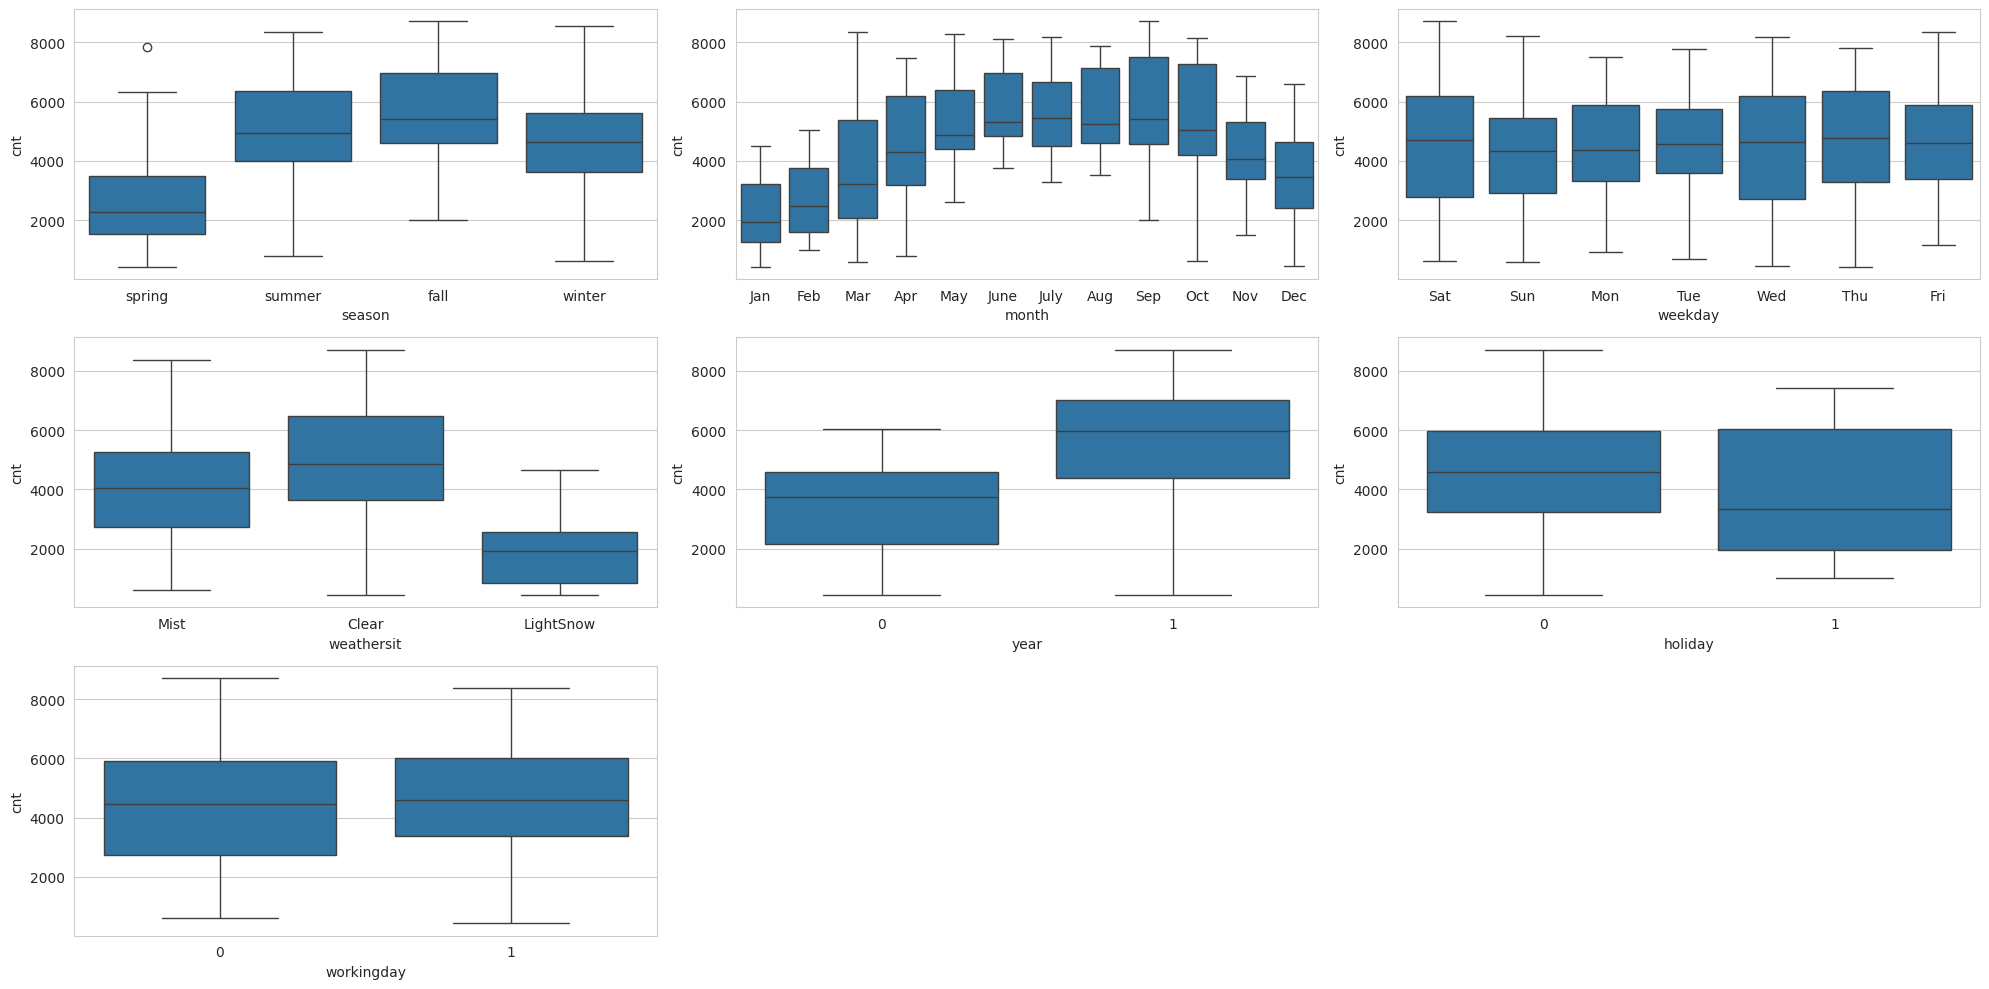

In [236]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=bikeshare_df)
plt.subplot(3, 3, 2)
sns.boxplot(x='month', y='cnt', data=bikeshare_df)
plt.subplot(3, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=bikeshare_df)
plt.subplot(3, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=bikeshare_df)
plt.subplot(3, 3, 5)
sns.boxplot(x='year', y='cnt', data=bikeshare_df)
plt.subplot(3, 3, 6)
sns.boxplot(x='holiday', y='cnt', data=bikeshare_df)
plt.subplot(3, 3, 7)
sns.boxplot(x='workingday', y='cnt', data=bikeshare_df)
plt.tight_layout()


plt.show()

removing outliers from cnt vs season where cnt > 7000

In [237]:
bikeshare_df.drop(bikeshare_df[(bikeshare_df['season'] == 'spring') & (bikeshare_df['cnt'] > 7000)].index)
bikeshare_df['cnt'] > 7000

,cnt
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Correlation analysis with Heatmap

Data-preprocessing - dummy cariables for cat_features

In [238]:
season_indicators = pd.get_dummies(bikeshare_df['season'],drop_first=True)
month_indicators = pd.get_dummies(bikeshare_df['month'],drop_first=True)
weekday_indicators = pd.get_dummies(bikeshare_df['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(bikeshare_df['weathersit'],drop_first=True)
bikeshare_df = pd.concat([bikeshare_df,season_indicators,month_indicators,weekday_indicators,weathersit_indicators],axis=1)
bikeshare_df = bikeshare_df.drop(columns=['season','month','weekday','weathersit'])

bikeshare_df.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,69.6087,16.652113,801,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,True,False,False


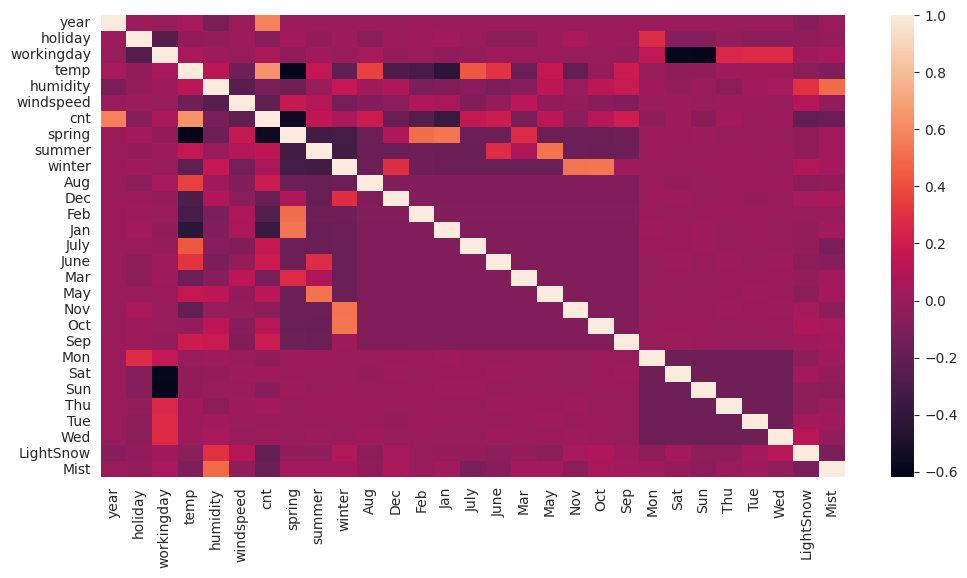

In [239]:
plt.figure(figsize=(12,6))
sns.heatmap(bikeshare_df.corr())
plt.show()

In [240]:
bikeshare_df.describe()


,year,holiday,workingday,temp,humidity,windspeed,cnt
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,0.502069,0.028966,0.684138,20.315628,62.803903,12.694920,4531.873103
std,0.500341,0.167825,0.465179,7.520748,13.895651,5.112447,1920.336825
min,0.000000,0.000000,0.000000,2.424346,25.416700,1.500244,431.000000
25%,0.000000,0.000000,0.000000,13.769153,52.000000,9.000914,3214.000000
50%,1.000000,0.000000,1.000000,20.500000,62.583300,12.041843,4563.000000
75%,1.000000,0.000000,1.000000,26.889153,72.958300,15.608990,5986.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,29.584721,8714.000000


# Train-Test Split

In [241]:
df_bikes_train,df_bikes_test=train_test_split(bikeshare_df,train_size=0.7,random_state=100)
print(df_bikes_train.shape)
print(df_bikes_test.shape)

(507, 29)
(218, 29)


Data-preprocessing - MinMax Scaling

In [242]:
numerical_scaler = MinMaxScaler()
num_vars = ['temp','humidity','windspeed']
numerical_scaler.fit(df_bikes_train[num_vars])
df_bikes_train[num_vars] = numerical_scaler.fit_transform(df_bikes_train[num_vars])
df_bikes_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
641,1,0,1,0.745598,0.634311,0.227006,7328,False,False,True,...,True,False,False,False,False,True,False,False,False,True
728,1,0,0,0.245101,0.283272,0.783361,1796,True,False,False,...,False,False,False,False,True,False,False,False,False,False
478,1,0,1,0.441354,0.240538,0.541524,5633,False,True,False,...,False,False,False,False,False,False,True,False,False,False
113,0,0,0,0.651106,0.763125,0.405045,4191,False,True,False,...,False,False,False,False,True,False,False,False,False,True
685,1,0,0,0.331287,0.374237,0.375353,5629,False,False,True,...,False,False,False,True,False,False,False,False,False,False


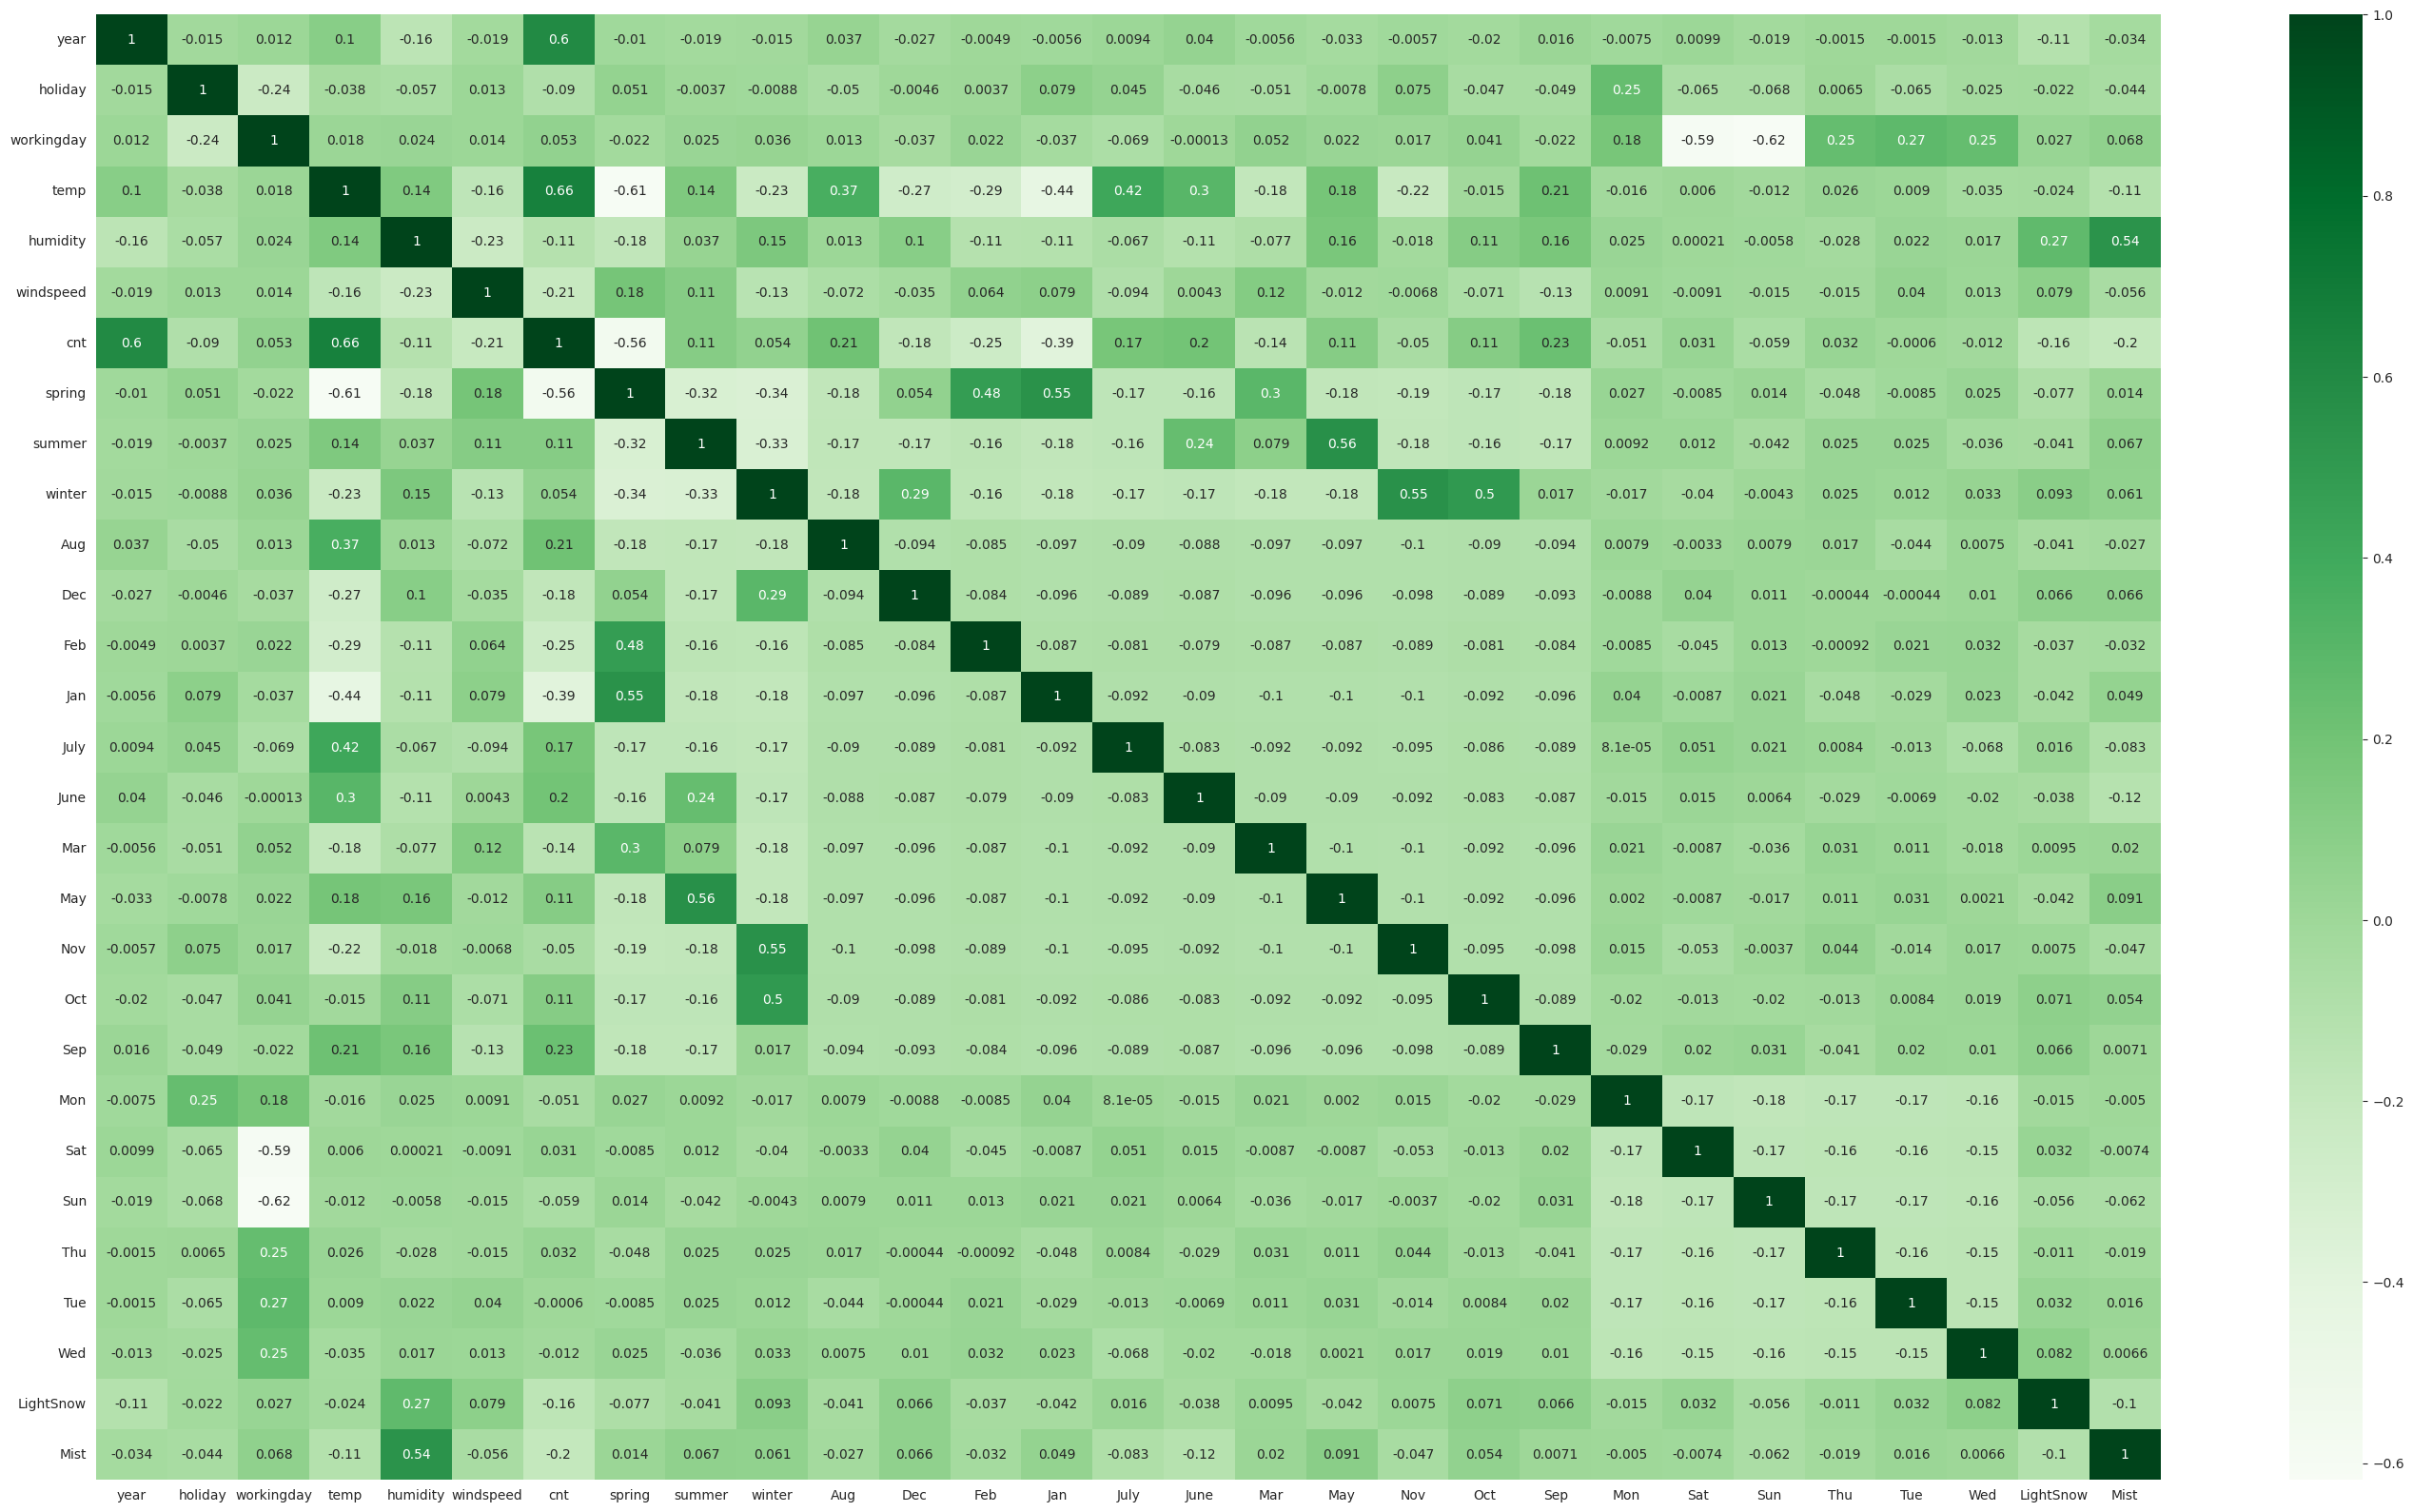

In [243]:
plt.figure(figsize = (35, 20))
sns.heatmap(df_bikes_train.corr(), annot = True,cmap ='Greens')
plt.show()

divide dependent and independent variables for X-train and y-train

In [244]:
y_train = df_bikes_train.pop('cnt')
y_train.head()
X_train = df_bikes_train
X_train.head()


,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
641,1,0,1,0.745598,0.634311,0.227006,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True
728,1,0,0,0.245101,0.283272,0.783361,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
478,1,0,1,0.441354,0.240538,0.541524,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
113,0,0,0,0.651106,0.763125,0.405045,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
685,1,0,0,0.331287,0.374237,0.375353,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


# Model Creation
two model creation approach with RFE and P method, P method even further filters the variables statistically for model creation.It is advisable to go with RFE first and limit the variables and then P method to determine stastically

In [245]:
X_train.columns = X_train.columns.astype(str)

lr = LinearRegression()
rfe = RFE(lr,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [246]:
rfe_rank = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_rank

,rank,support,features
0,1,True,year
22,1,True,Sun
21,1,True,Sat
19,1,True,Sep
17,1,True,Nov
26,1,True,LightSnow
12,1,True,Jan
10,1,True,Dec
27,1,True,Mist
6,1,True,spring


In [247]:
sel_features = rfe_rank.loc[rfe_rank['rank'] == 1,'features'].values
sel_features

array(['year', 'Sun', 'Sat', 'Sep', 'Nov', 'LightSnow', 'Jan', 'Dec',
       'Mist', 'spring', 'holiday', 'humidity', 'winter', 'temp',
       'workingday'], dtype=object)

# Building Model with statsmodel

In [248]:
# Func for Ordinary Least Squares Regression Fit
def ols_fit(y, X):
    X_train_sm = sm.add_constant(X.astype(float)) # Convert X to float to ensure numerical data
    model = sm.OLS(y.astype(float), X_train_sm).fit() # Convert y to float
    print(model.summary())
    return model

# Function for Variance Inflation Factor (VIF) Calculation
def vif(X):
    df = sm.add_constant(X.astype(float)) # Convert X to float
    vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif': vif[0:]}, index=df.columns).reset_index()
    print(vif_frame.sort_values(by='vif', ascending=False))

#Check the dtypes of y_train and X_train before calling ols_fit
print(y_train.dtype)
print(X_train.dtypes)

#If any columns are of type 'object', convert them to a suitable numeric type before calling ols_fit
#Example:
#X_train['problematic_column'] = X_train['problematic_column'].astype(float)

#Call ols_fit after ensuring data types are correct


int64
year            int64
holiday         int64
workingday      int64
temp          float64
humidity      float64
windspeed     float64
spring           bool
summer           bool
winter           bool
Aug              bool
Dec              bool
Feb              bool
Jan              bool
July             bool
June             bool
Mar              bool
May              bool
Nov              bool
Oct              bool
Sep              bool
Mon              bool
Sat              bool
Sun              bool
Thu              bool
Tue              bool
Wed              bool
LightSnow        bool
Mist             bool
dtype: object


Model A - using features selected by RFE process

In [249]:
features_A = sel_features
ols_fit(y_train,X_train[features_A])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.96e-191
Time:                        03:25:17   Log-Likelihood:                -4084.4
No. Observations:                 507   AIC:                             8199.
Df Residuals:                     492   BIC:                             8262.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1695.2527    161.840     10.475      0.0

# Model B
Dropping "holiday" because of its high P value

In [250]:
del_feature = 'holiday'
sel_features = sel_features[sel_features!=del_feature]
ols_fit(y_train,X_train[sel_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.96e-191
Time:                        03:25:17   Log-Likelihood:                -4084.4
No. Observations:                 507   AIC:                             8199.
Df Residuals:                     492   BIC:                             8262.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1699.4534    292.220      5.816      0.0

# Model C
Dropping "sun" because of high P value

In [251]:
del_feature = 'Sun'
sel_features = sel_features[sel_features!=del_feature]
ols_fit(y_train,X_train[sel_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.53e-192
Time:                        03:25:17   Log-Likelihood:                -4085.4
No. Observations:                 507   AIC:                             8199.
Df Residuals:                     493   BIC:                             8258.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1979.9046    209.132      9.467      0.0

Verifying Multi-Collinearity with VIF on selected features

In [252]:
vif(X_train[sel_features])

         index        vif
0        const  36.908539
12        temp   3.025766
9       spring   2.814415
11      winter   2.338071
10    humidity   1.981907
4          Nov   1.796295
8         Mist   1.741984
13  workingday   1.577711
6          Jan   1.573704
2          Sat   1.566948
7          Dec   1.424886
5    LightSnow   1.245701
3          Sep   1.101237
1         year   1.066521


final model as 'z model'

In [253]:
Z_model = ols_fit(y_train,X_train[sel_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.53e-192
Time:                        03:25:17   Log-Likelihood:                -4085.4
No. Observations:                 507   AIC:                             8199.
Df Residuals:                     493   BIC:                             8258.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1979.9046    209.132      9.467      0.0

# Residual analysis and visualization

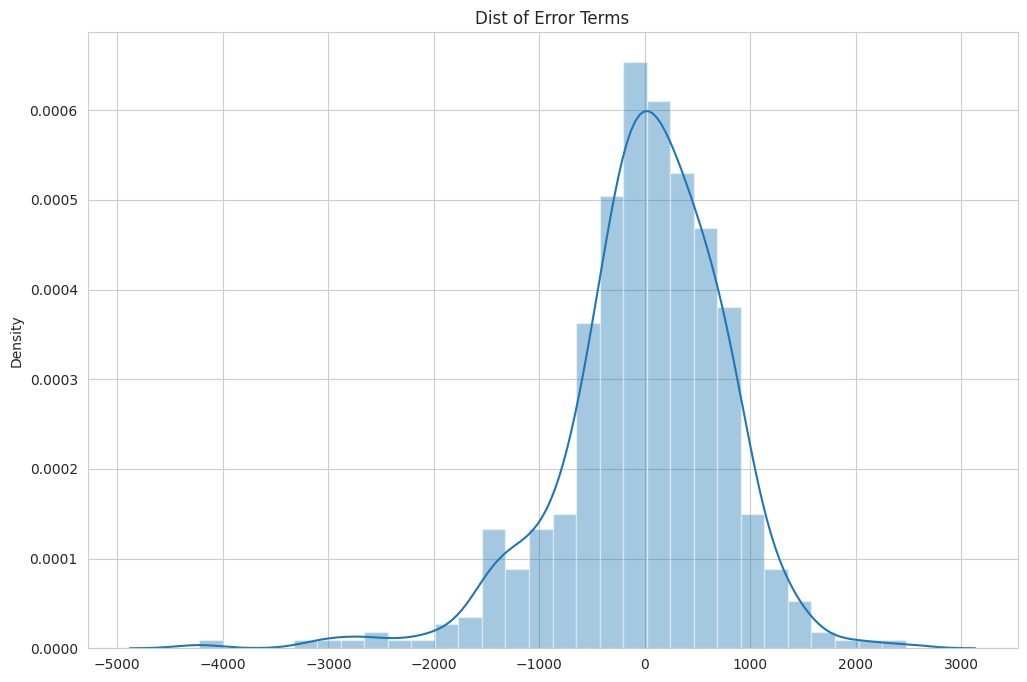

In [254]:
# Analysis of Trained Data set
X_train_sm = sm.add_constant(X_train[sel_features])

y_train_pred = Z_model.predict(X_train_sm)
fig, ax = plt.subplots(figsize=(12, 8))

ax.set(title='Dist of Error Terms')
sns.distplot(y_train - y_train_pred, bins=30, ax=ax)

plt.show()

# Model Predictions

In [255]:
numerical_scaler = MinMaxScaler()
df_bikes_test.describe()
df_bikes_test.head()
df_bikes_test.columns


Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'LightSnow', 'Mist'],
      dtype='object')

In [256]:
##num_vars = ['temp','humidity','windspeed']
y_test = df_bikes_test.pop('cnt')
X_test = df_bikes_test
X_test[num_vars] = numerical_scaler.fit_transform(X_test[num_vars])
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[sel_features]



In [257]:
X_test = sm.add_constant(X_test)
y_test_pred = Z_model.predict(X_test)
X_test.head()
y_test_pred.head()

,0
242,2215.195562
493,3747.869227
590,4268.846186
488,4252.934329
151,1733.740524


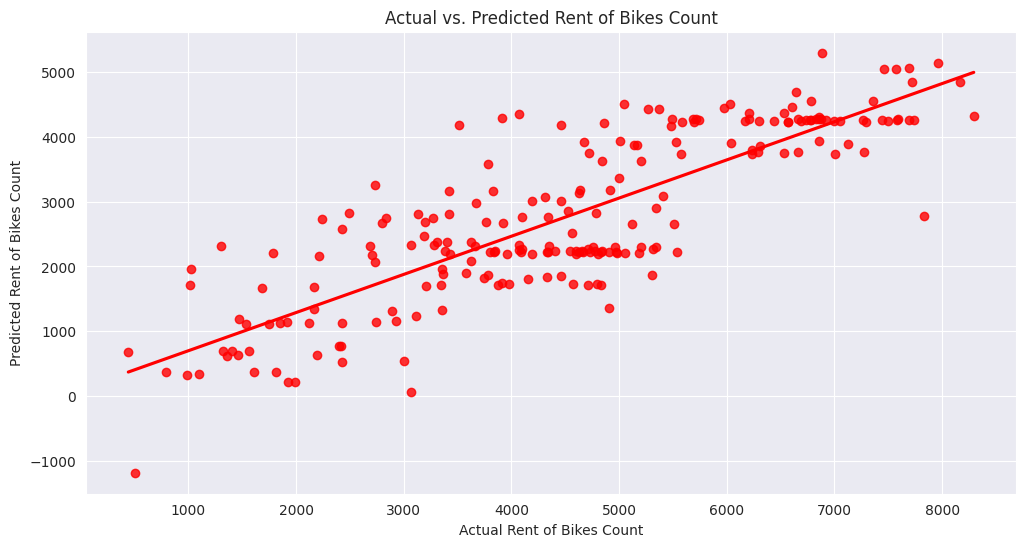

In [258]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred, ci=None, color ='red')
#sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()